In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My Projects on ML/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#Data Preprocessing

In [ ]:
df.shape

(6497, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [ ]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [ ]:
df['type'].value_counts()

,count
type,
1,4898
0,1599


In [ ]:
df.shape

(6497, 13)

In [ ]:
df.duplicated().sum()

1168

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [ ]:
ms = MinMaxScaler()
scaled_data = ms.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

In [ ]:
df_scaled.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.5
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.5
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5
4,1.0,0.198347,0.160000,0.096386,0.098160,0.059801,0.100694,0.299539,0.150183,0.356589,0.140449,0.231884,0.5


In [ ]:
df_scaled['quality'].value_counts()

,count
quality,
0.500000,2327
0.333333,1755
0.666667,857
0.166667,206
0.833333,149
0.000000,30
1.000000,5


#Selection and Training the Model

In [ ]:
X, Y = df_scaled.drop('quality', axis=1), df_scaled['quality']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
mean_squared_error(Y_test, Y_pred)

0.015566950011375527

In [ ]:
r2_score(Y_test, Y_pred)

0.2792349266230322

#Outliers Detection and handling

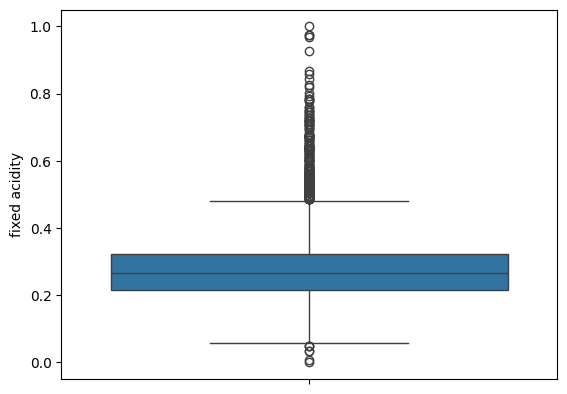

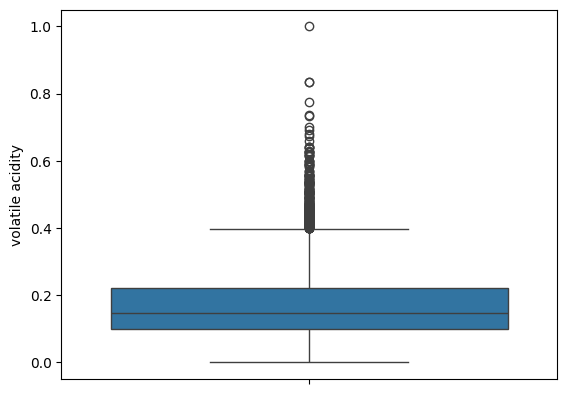

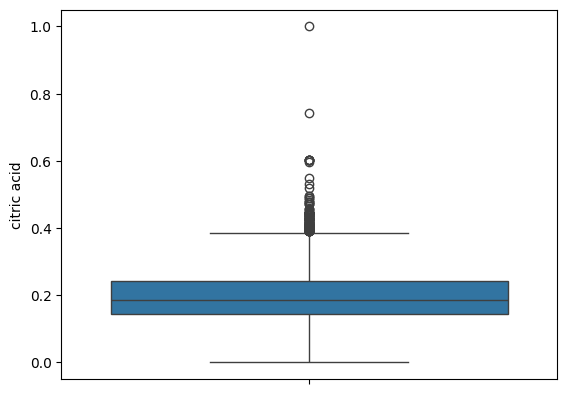

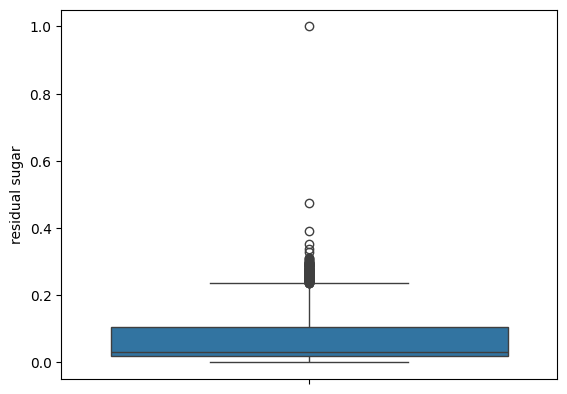

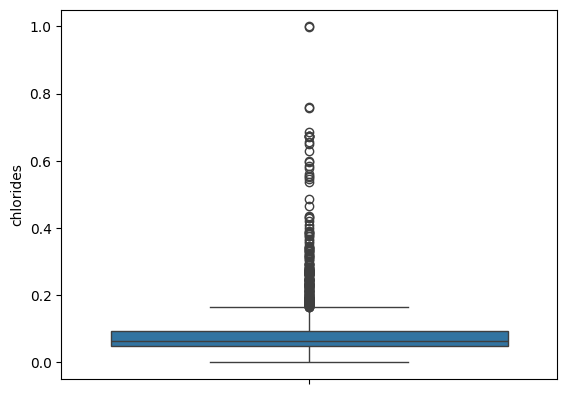

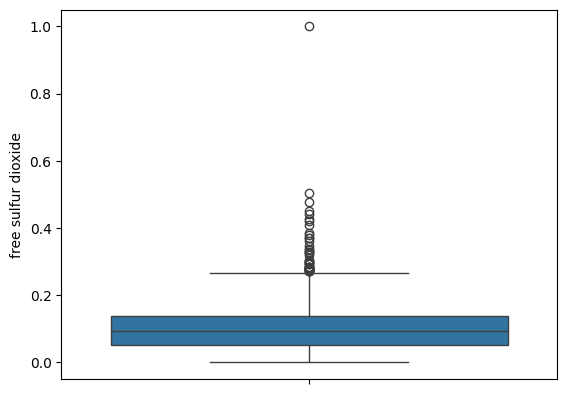

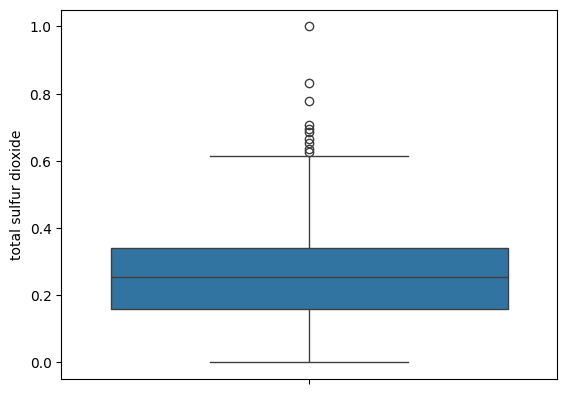

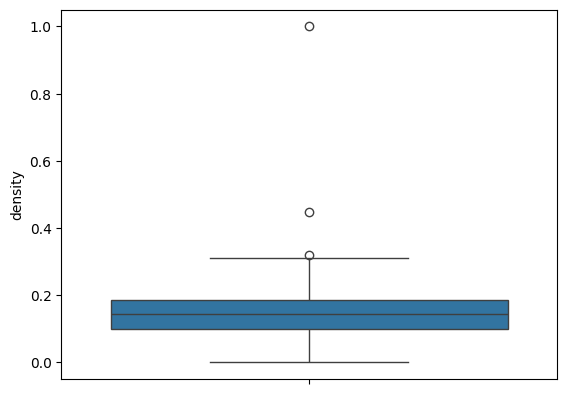

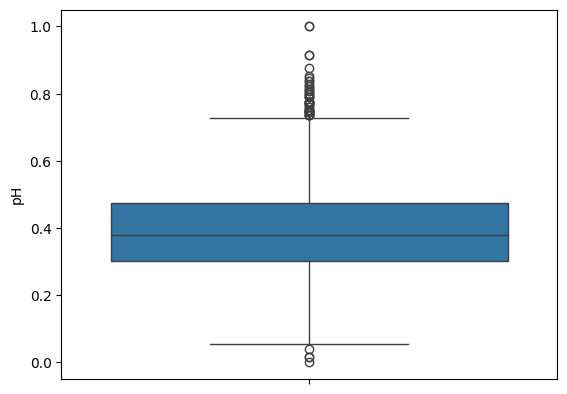

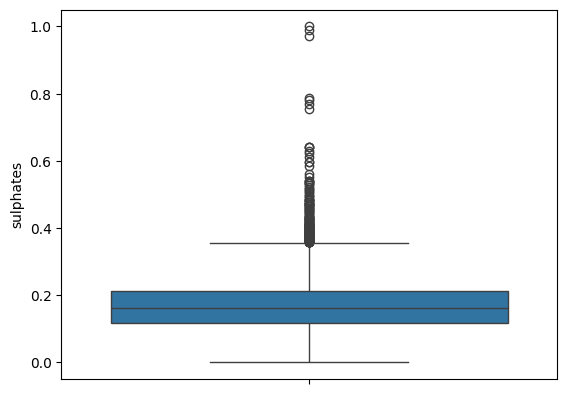

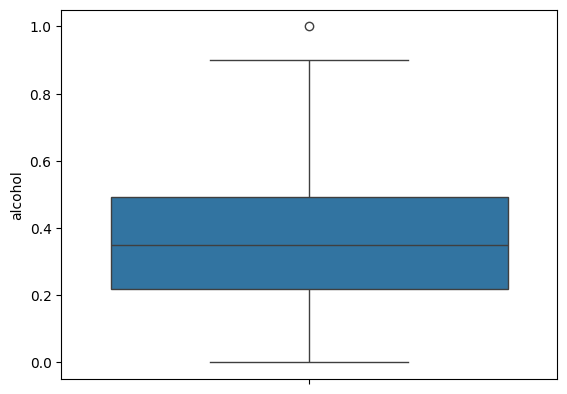

In [ ]:
for i in df_scaled.select_dtypes(include='number').columns:
    if i=='quality' or i=='type':
        continue
    sns.boxplot(data=df_scaled[i])
    plt.show()

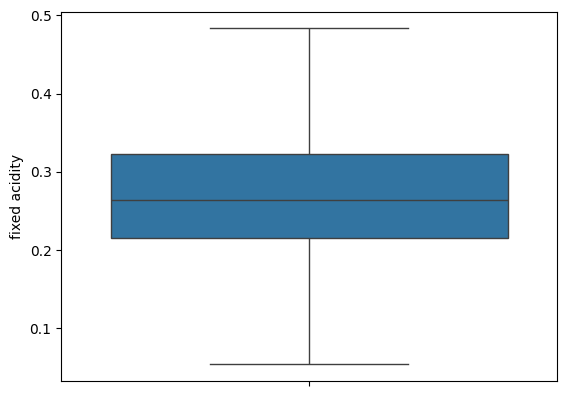

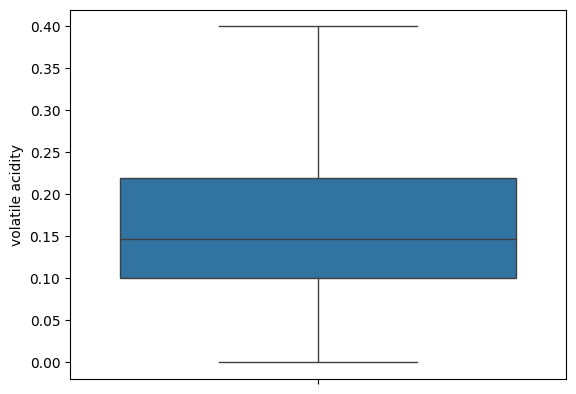

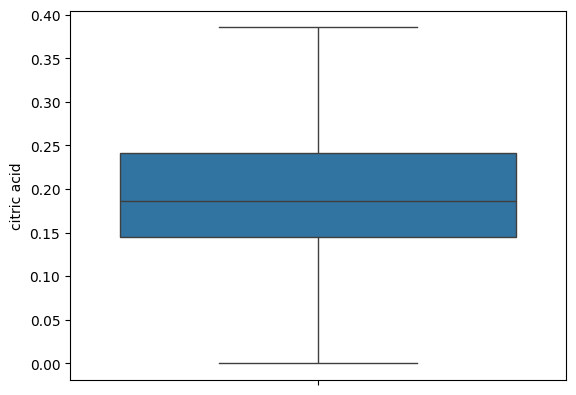

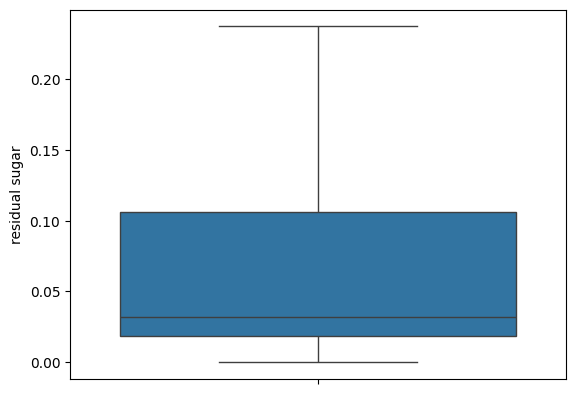

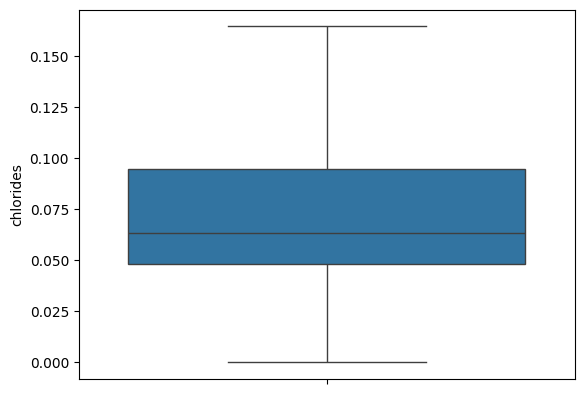

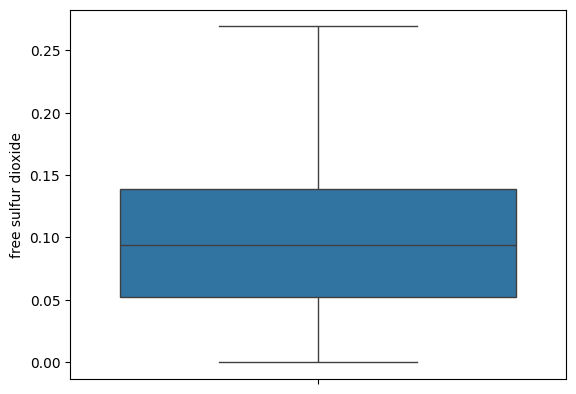

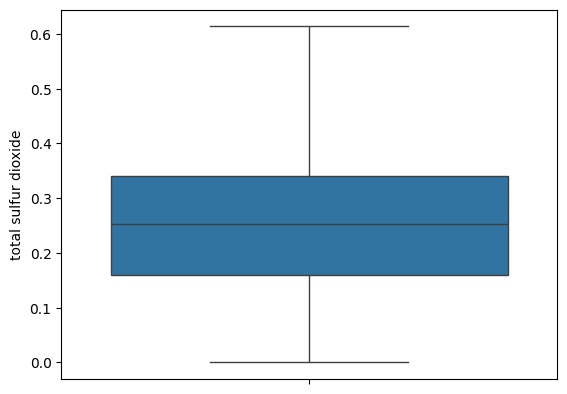

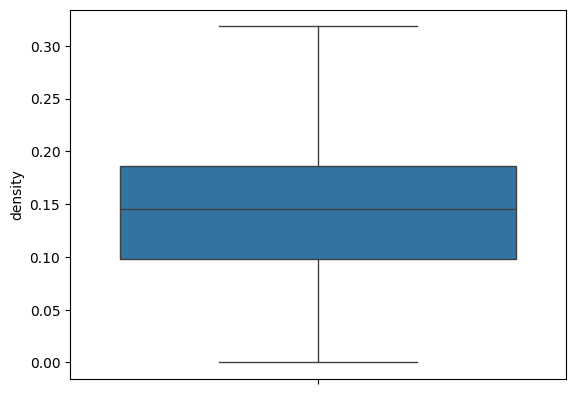

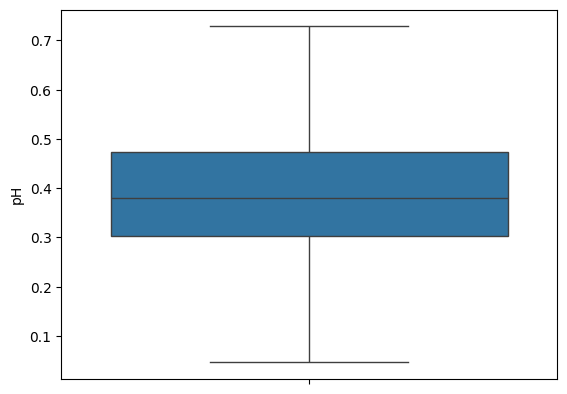

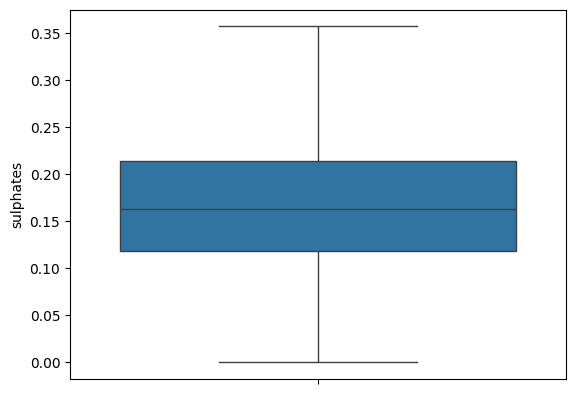

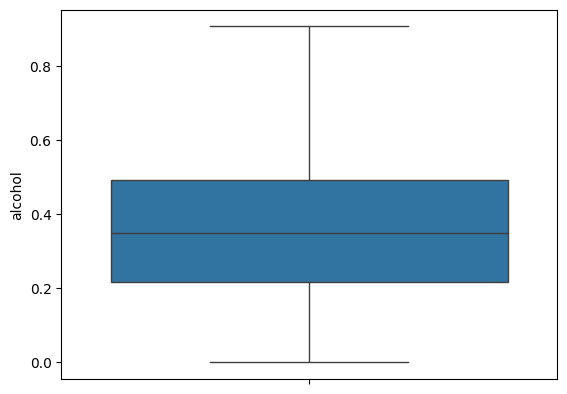

In [ ]:
for i in df_scaled.select_dtypes(include='number').columns:
    if i=='quality' or i=='type':
        continue
    Q1 = df_scaled[i].quantile(0.25)
    Q3 = df_scaled[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df_scaled[i] = np.clip(df_scaled[i], lower_bound, upper_bound)

for i in df_scaled.select_dtypes(include='number').columns:
    if i=='quality' or i=='type':
        continue
    sns.boxplot(data=df_scaled[i])
    plt.show()

#Training and Evaluating the Scaled Dataframe

In [ ]:
X1, Y1 = df_scaled.drop('quality', axis=1), df_scaled['quality']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
lrr = LinearRegression()
lrr.fit(X1_train, Y1_train)
Y1_pred = lrr.predict(X1_test)

In [ ]:
r2_score(Y1_test, Y1_pred)

0.2987558398739929

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_jobs': [-1],
    'fit_intercept': [True, False]
}

In [ ]:
rscv = RandomizedSearchCV(lrr, param_grid, cv=5, scoring='r2', n_iter=10)
rscv.fit(X1_train, Y1_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'n_jobs': [-1]},
                   scoring='r2')

In [ ]:
print("Best parameters:", rscv.best_params_)
print("Best R2 score:", rscv.best_score_)

Best parameters: {'n_jobs': -1, 'fit_intercept': True}
Best R2 score: 0.3093495587593342


In [ ]:
best_lrr = LinearRegression(n_jobs=-1,fit_intercept=True)
best_lrr.fit(X1_train, Y1_train)

LinearRegression(n_jobs=-1)

In [ ]:
Y1_pred_rscv = best_lrr.predict(X1_test)
print("R2 score on test set:", r2_score(Y1_test, Y1_pred_rscv))

R2 score on test set: 0.2987558398739929


In [ ]:
r2_score(Y1_train, best_lrr.predict(X1_train))

0.3160934670997164

In [ ]:
df_pred = pd.DataFrame({'Actual': Y1_test, 'Predicted': Y1_pred_rscv})
df_pred.head(20)

,Actual,Predicted
1323,0.166667,0.429191
1839,0.333333,0.431316
798,0.666667,0.406566
3855,0.666667,0.390909
4552,0.333333,0.318699
856,0.666667,0.466051
2333,0.333333,0.468763
2499,0.333333,0.510830
5010,0.500000,0.375763
4379,0.500000,0.382961


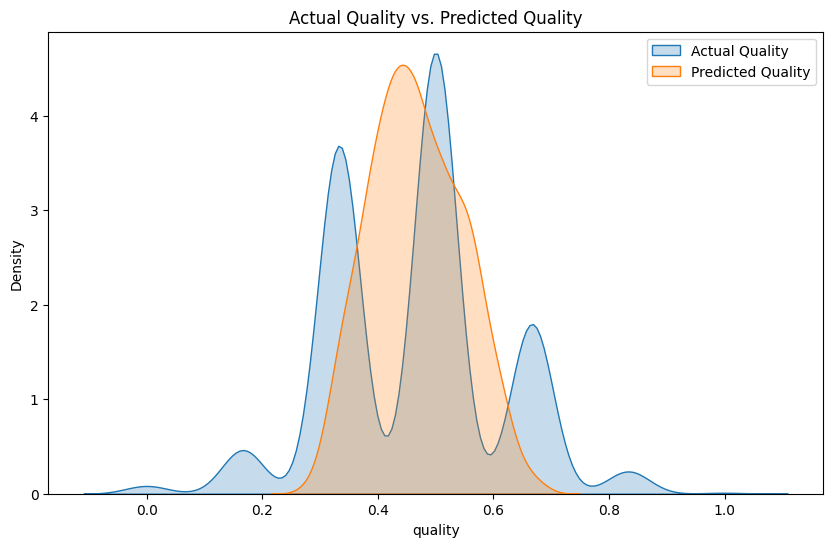

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(Y1_test, label='Actual Quality', fill=True)
sns.kdeplot(Y1_pred_rscv, label='Predicted Quality', fill=True)
plt.title('Actual Quality vs. Predicted Quality')
plt.legend()
plt.show()

#Rounded accuracy

In [ ]:
accuracy_score(np.round(Y1_test), np.round(Y1_pred_rscv))

0.7382739212007504

#Therefore LinearRegression Evaluation on training set resulted 31.6% of r2_score and on testing set it resulted 29.87%

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
df_copy = df.copy()
X2 = df_copy.drop('quality', axis=1)
Y2 = df_copy['quality']

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X2_train, Y2_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(X2_test)
accuracy_score(Y2_test, dt_pred)

0.46622889305816134

In [ ]:
df_copy['quality'].value_counts()

,count
quality,
6,2327
5,1755
7,857
4,206
8,149
3,30
9,5


In [ ]:
Y2_train.value_counts()

,count
quality,
6,1872
5,1396
7,682
4,161
8,126
3,22
9,4


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(k_neighbors=3, random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X2_train, Y2_train)

print(f"Resampled dataset shape: {Counter(Y_resampled)}")

Resampled dataset shape: Counter({6: 1872, 5: 1872, 4: 1872, 8: 1872, 7: 1872, 3: 1872, 9: 1872})


In [ ]:
Y_resampled.value_counts()

,count
quality,
6,1872
5,1872
4,1872
8,1872
7,1872
3,1872
9,1872


In [ ]:
dt.fit(X_resampled, Y_resampled)

DecisionTreeClassifier()

In [ ]:
dt_resampled_pred = dt.predict(X2_test)
accuracy_score(Y2_test, dt_resampled_pred)

0.4277673545966229

#Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X2_train, Y2_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf.predict(X2_test)
accuracy = accuracy_score(Y2_test, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5712945590994372


In [ ]:
le1 = LabelEncoder()
Y2_train_encoded = le1.fit_transform(Y2_train)

In [ ]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X2_train, Y2_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_pred = xgb.predict(X2_test)
xgb_pred_original = le1.inverse_transform(xgb_pred)

In [ ]:
accuracy = accuracy_score(Y2_test, xgb_pred_original)
print("Accuracy:", accuracy)

Accuracy: 0.551594746716698


In [ ]:
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.2987, 0.4662, 0.5712, 0.5515]
}

df_results = pd.DataFrame(data)
print(df_results)

               Model  Accuracy
0  Linear Regression    0.2987
1      Decision Tree    0.4662
2      Random Forest    0.5712
3            XGBoost    0.5515


#Therefore, RandomForest Classifier performs well prediction with 57.12% of Accuracy

#Validation of Trained Model (Random Forest) with new Input data

In [ ]:
def validate_random_forest(new_data, rf_model):
  predictions = rf_model.predict(new_data)
  return predictions
new_data = [0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8]
new_data = np.array(new_data).reshape(1, -1)
predictions = validate_random_forest(new_data, rf)
print(predictions)

[6]
